Standard_Deviation of Cluster 0 is= 1.843716287827387
Mean of Cluster 0 is= 2.5355
Standard_Deviation of Cluster 1 is= 1.4577379737113252
Mean of Cluster 1 is= 2.9
Standard_Deviation of Cluster 2 is= 1.9868106054266816
Mean of Cluster 2 is= 4.49765625
Standard_Deviation of Cluster 3 is= 1.8013231898732107
Mean of Cluster 3 is= 3.886874999999999
Standard_Deviation of Cluster 4 is= 1.6336468661657984
Mean of Cluster 4 is= 3.4125
ratio of intra over inter= 0.07490582457093779


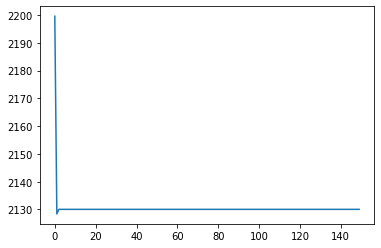

In [12]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
from random import randrange
import numpy as np
from sklearn.datasets import load_iris 


iris = load_iris()
data = iris.data
num_clusters = 5
iter = 150



def distance(point1, point2):
	dis = point1-point2
	return (np.dot(dis, dis))**.5

def create_centroids(data, num_clusters):
	centroids = []
	a,b = np.shape(data)
	for j in range(0, num_clusters):
		temp = []
		for i in range(0, b):
			maxx = int(max(data[:,i]))
			minx = int(min(data[:,i]))
			temp.append(randrange(minx, maxx)) # Each iteration create a coordinate foe each centroid
		centroids.append(temp)
	return np.asarray(centroids)
 
def label(data, centroids):
	m, n = np.shape(data)
	lab = []
	for i in range(0, m):
		dis = []
		x, y = np.shape(centroids)
		for j in range(0,x): #Move on each centroid
			dis.append(distance(centroids[j,:], data[i, :]))
		lab.append(np.argmin(dis))
	return np.asarray(lab)
 
def update_centroids(data, labels, centroids):
    m, n = np.shape(centroids) #m is the number of centroids
    temp_centroid = np.zeros((m,n))
    count = np.zeros((m,n))
    for j in range(0, len(labels)):
        for k in range(0, n):
            temp_centroid[labels[j],k]+= data[j,k]
            count[labels[j],k]+= 1
    for i in range(0,m):
        for j in range(0,n):
            if count[i,j] == 0:
                count[i,j] += 1
    return temp_centroid/count

def interclus(label,data):
  S=0
  for i in range(data.shape[0]):
    for j in range(data.shape[0]):
      S = S + distance(data[i,:],data[j,:])
  S = S/2
  return S - intraclus(label,data)


def intraclus(label,data):
  l = num_clusters
  T = np.zeros(l)
  for k in range(l):
    a = data[label==k]
    #print(a)
    for i in range(len(a)):
      for j in range(len(a)):
        T[k] += (distance(a[i,:],a[j,:]))
    T[k]=T[k]/2
  return T.sum()

centroids = create_centroids(data, num_clusters)   
labels = label(data, centroids)
cost = np.zeros(iter)
for i in range(iter):
  centroids = update_centroids(data, labels, centroids)
  labels = label(data, centroids)
  cost[i] = intraclus(labels,data)

#print(cost)

for i in range(num_clusters):
  print ('Standard_Deviation of Cluster {} is= {}'.format(i,data[labels==i].std()))
  print ('Mean of Cluster {} is= {}'.format(i,data[labels==i].mean()))


print ('ratio of intra over inter=', cost[-1]/interclus(label,data))

plt.plot(range(iter),cost)



Standard_Deviation of Cluster 0 is= 1.9868106054266816
Mean of Cluster 0 is= 4.49765625
Standard_Deviation of Cluster 1 is= 1.843716287827387
Mean of Cluster 1 is= 2.5355
Standard_Deviation of Cluster 2 is= 1.6201714789804735
Mean of Cluster 2 is= 3.3153846153846156
Standard_Deviation of Cluster 3 is= nan
Mean of Cluster 3 is= nan
Standard_Deviation of Cluster 4 is= 1.7921288559051216
Mean of Cluster 4 is= 3.8755952380952374
ratio of intra over inter= 0.08001018462111238


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


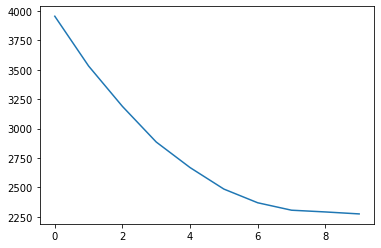

In [1]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
from random import randrange
import numpy as np
from sklearn.datasets import load_iris 


iris = load_iris()
data = iris.data
num_clusters = 5
iter = 10



def distance(point1, point2):
	dis = point1-point2
	return (np.dot(dis, dis))**.5

def create_centroids(data, num_clusters):
	centroids = []
	a,b = np.shape(data)
	for j in range(0, num_clusters):
		temp = []
		for i in range(0, b):
			maxx = int(max(data[:,i]))
			minx = int(min(data[:,i]))
			temp.append(randrange(minx, maxx)) # Each iteration create a coordinate foe each centroid
		centroids.append(temp)
	return np.asarray(centroids)
 
def label(data, centroids):
	m, n = np.shape(data)
	lab = []
	for i in range(0, m):
		dis = []
		x, y = np.shape(centroids)
		for j in range(0,x): #Move on each centroid
			dis.append(distance(centroids[j,:], data[i, :]))
		lab.append(np.argmin(dis))
	return np.asarray(lab)
 
def update_centroids(data, labels, centroids):
    m, n = np.shape(centroids) #m is the number of centroids
    temp_centroid = np.zeros((m,n))
    count = np.zeros((m,n))
    for j in range(0, len(labels)):
        for k in range(0, n):
            temp_centroid[labels[j],k]+= data[j,k]
            count[labels[j],k]+= 1
    for i in range(0,m):
        for j in range(0,n):
            if count[i,j] == 0:
                count[i,j] += 1
    return temp_centroid/count

def interclus(label,data):
  S=0
  for i in range(data.shape[0]):
    for j in range(data.shape[0]):
      S = S + distance(data[i,:],data[j,:])
  S = S/2
  return S - intraclus(label,data)


def intraclus(label,data):
  l = num_clusters
  T = np.zeros(l)
  for k in range(l):
    a = data[label==k]
    #print(a)
    for i in range(len(a)):
      for j in range(len(a)):
        T[k] += (distance(a[i,:],a[j,:]))
    T[k]=T[k]/2
  return T.sum()

centroids = create_centroids(data, num_clusters)   
labels = label(data, centroids)
cost = np.zeros(iter)
for i in range(iter):
  centroids = update_centroids(data, labels, centroids)
  labels = label(data, centroids)
  cost[i] = intraclus(labels,data)

#print(cost)

for i in range(num_clusters):
  print ('Standard_Deviation of Cluster {} is= {}'.format(i,data[labels==i].std()))
  print ('Mean of Cluster {} is= {}'.format(i,data[labels==i].mean()))


print ('ratio of intra over inter=', cost[-1]/interclus(label,data))

plt.plot(range(iter),cost)

